In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
from sklearn.grid_search import GridSearchCV
warnings.filterwarnings('ignore')

# creating dataframe from csv file
df = pd.read_csv('../data.csv')
del df["Id"]

print("DataFrame Shape is : {}".format(df.shape))
df.head()

DataFrame Shape is : (1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [49]:
# filled meadian value in misising values
numerical_data = df.select_dtypes(exclude = ['O']).fillna(df.median())
categorical_data = df.select_dtypes(include = ['O']).fillna('NA')

print(numerical_data.shape)
print(categorical_data.shape)
categorical_data.head()

(1460, 37)
(1460, 43)


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
1,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
2,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
3,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,Abnorml
4,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal


In [50]:
# done one hot encoding for 
data = numerical_data.join(categorical_data)
feature_list = list(data.columns)
df_one_hot = pd.get_dummies(data)
df_one_hot.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [51]:
for i in list(df_one_hot.columns):
    mean = df_one_hot[i].mean()
    sd = df_one_hot[i].std()
    df_one_hot[i] = (df_one_hot[i]-mean)/sd
    


In [66]:
X = df_one_hot.drop('SalePrice', axis=1)
Y = df_one_hot["SalePrice"]

print(X.shape)
print(Y.shape)

(1460, 304)
(1460,)


# Random Forest

In [53]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

def final_abs_error_rand_forest(X, Y, n_splits = 5):
    kf = KFold(n_splits, random_state= 50, shuffle=True)
    error = 0
    param_grid = {
              'max_depth': [4, 6 , 8, 10],
              'min_samples_leaf': [3, 5, 9, 12],
              'n_estimators' : [500]
              
              }
    for train_index, test_index in kf.split(X):
    
            X_train, X_test = X.as_matrix()[train_index], X.as_matrix()[test_index]
            Y_train, Y_test = Y.as_matrix()[train_index], Y.as_matrix()[test_index]
            
            
            rf = RandomForestRegressor(max_features="sqrt")
            gs_cv = GridSearchCV(rf, param_grid, n_jobs=8).fit(X_train,Y_train)
            Y_pred = gs_cv.predict(X_test)
            # Y_pred = RandomForestRegressor(max_features="sqrt",max_depth = gs_cv.best_params_['max_depth'],min_samples_leaf = gs_cv.best_params_['min_samples_leaf'],n_estimators = gs_cv.best_params_['n_estimators']).fit(X_train,Y_train ).predict(X_test)
            error = error + sum(np.absolute(Y_pred-Y_test))/(len(Y_test))
                                                         
    return error/n_splits

print(final_abs_error_rand_forest(X, Y, 5))


0.234280934877


Mean Absolute Error of Test data: 0.22000915072332583


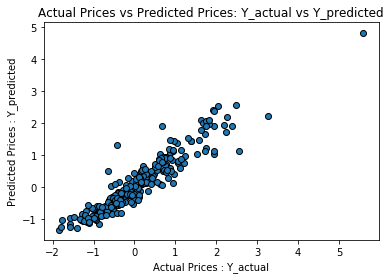

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
rf = RandomForestRegressor(n_estimators=500, random_state=0)
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)

err=sum(np.absolute(Y_pred-Y_test))/(len(Y_test))
print("Mean Absolute Error of Test data: {}".format(err))
plt.scatter(Y_test, Y_pred, edgecolors=(0, 0, 0))
plt.xlabel("Actual Prices : Y_actual")
plt.ylabel("Predicted Prices : Y_predicted")
plt.title("Actual Prices vs Predicted Prices: Y_actual vs Y_predicted")
plt.show()

In [55]:
# feature importances
importance = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importance = [(feature, round(important, 5)) for feature, important in zip(feature_list, importance)] 
# Sort the feature importances by most important first
feature_importance = sorted(feature_importance, key = lambda x: x[1], reverse = True) 
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance]

Variable: OverallQual          Importance: 0.59107
Variable: GrLivArea            Importance: 0.09454
Variable: 2ndFlrSF             Importance: 0.03224
Variable: TotalBsmtSF          Importance: 0.028
Variable: 1stFlrSF             Importance: 0.02502
Variable: BsmtFinSF1           Importance: 0.02368
Variable: GarageCars           Importance: 0.02247
Variable: GarageArea           Importance: 0.01918
Variable: LotArea              Importance: 0.0145
Variable: FullBath             Importance: 0.01076
Variable: YearBuilt            Importance: 0.00994
Variable: TotRmsAbvGrd         Importance: 0.00874
Variable: LotFrontage          Importance: 0.00773
Variable: OpenPorchSF          Importance: 0.00639
Variable: YearRemodAdd         Importance: 0.00624
Variable: BsmtUnfSF            Importance: 0.00557
Variable: WoodDeckSF           Importance: 0.00517
Variable: MasVnrArea           Importance: 0.00435
Variable: OverallCond          Importance: 0.00415
Variable: GarageYrBlt          Imp

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# Gradient Boosting

In [56]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor

def final_abs_error_grad_boost(X, Y, n_splits = 5):
    kf = KFold(n_splits, random_state= 50, shuffle=True)
    error = 0
    param_grid = {
              'max_depth': [4, 6 , 8],
              'min_samples_leaf': [3, 5, 9]
              
              }
    for train_index, test_index in kf.split(X):
    
            X_train, X_test = X.as_matrix()[train_index], X.as_matrix()[test_index]
            Y_train, Y_test = Y.as_matrix()[train_index], Y.as_matrix()[test_index]
            
            gb = GradientBoostingRegressor(n_estimators=3000, learning_rate= 0.02)
            gs_cv = GridSearchCV(gb, param_grid, n_jobs=8).fit(X_train,Y_train)
            Y_pred = gs_cv.predict(X_test)
            # gb = GradientBoostingRegressor(max_depth = gs_cv.best_params_['max_depth'],min_samples_leaf = gs_cv.best_params_['min_samples_leaf'],n_estimators = gs_cv.best_params_['n_estimators'])
            # Y_pred = gb.fit(X_train,Y_train )
            
            error = error + sum(np.absolute(Y_pred-Y_test))/(len(Y_test))
            
                                                         
    return error/n_splits

print(final_abs_error_grad_boost(X, Y, 5))

0.197968229598


Mean Absolute Error of Test data: 0.20003176085148572


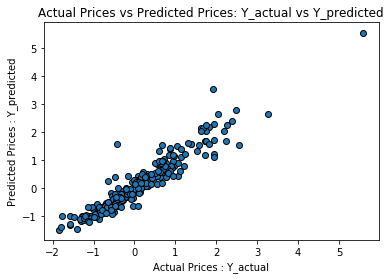

In [57]:
est = GradientBoostingRegressor(n_estimators=3000, max_depth=4, learning_rate=0.02,
                                loss='ls',min_samples_leaf=3, random_state=0)
est.fit(X_train, Y_train)
Y_pred = est.predict(X_test)

err=sum(np.absolute(Y_pred-Y_test))/(len(Y_test))
print("Mean Absolute Error of Test data: {}".format(err))
plt.scatter(Y_test, Y_pred, edgecolors=(0, 0, 0))
plt.xlabel("Actual Prices : Y_actual")
plt.ylabel("Predicted Prices : Y_predicted")
plt.title("Actual Prices vs Predicted Prices: Y_actual vs Y_predicted")
plt.show()

In [58]:
# feature importances
importance = list(est.feature_importances_)
# List of tuples with variable and importance
feature_importance = [(feature, round(important, 5)) for feature, important in zip(feature_list, importance)] 
# Sort the feature importances by most important first
feature_importance = sorted(feature_importance, key = lambda x: x[1], reverse = True) 
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance]

Variable: BsmtUnfSF            Importance: 0.05424
Variable: LotArea              Importance: 0.05239
Variable: GrLivArea            Importance: 0.04968
Variable: GarageArea           Importance: 0.04434
Variable: TotalBsmtSF          Importance: 0.0425
Variable: 1stFlrSF             Importance: 0.04129
Variable: BsmtFinSF1           Importance: 0.03595
Variable: MasVnrArea           Importance: 0.03236
Variable: LotFrontage          Importance: 0.03125
Variable: GarageYrBlt          Importance: 0.02943
Variable: YearBuilt            Importance: 0.02914
Variable: OverallQual          Importance: 0.02782
Variable: 2ndFlrSF             Importance: 0.02666
Variable: MoSold               Importance: 0.02623
Variable: WoodDeckSF           Importance: 0.02607
Variable: OpenPorchSF          Importance: 0.02267
Variable: YrSold               Importance: 0.02102
Variable: YearRemodAdd         Importance: 0.02078
Variable: OverallCond          Importance: 0.01391
Variable: 3SsnPorch            I

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# XGBoost

In [65]:
from xgboost import XGBRegressor
def final_abs_error_xg_boost(X, Y, n_splits = 5):
    kf = KFold(n_splits, random_state= 50, shuffle=True)
    error = 0
    
    param_grid = {
              'max_depth': [4, 6 , 8, 10],
              'learning_rate': [0.01,0.1,0.2,0.3]
              
              }
    for train_index, test_index in kf.split(X):
    
            X_train, X_test = X.as_matrix()[train_index], X.as_matrix()[test_index]
            Y_train, Y_test = Y.as_matrix()[train_index], Y.as_matrix()[test_index]
            
            xb = XGBRegressor(n_estimators = 2000)
            gs_cv = GridSearchCV(xb, param_grid, n_jobs=8).fit(X_train,Y_train)
            
            # xb = XGBRegressor(max_depth = gs_cv.best_params_['max_depth'],min_samples_leaf = gs_cv.best_params_['min_samples_leaf'],n_estimators = gs_cv.best_params_['n_estimators'])
            Y_pred = gs_cv.predict(X_test)
            error = error + sum(np.absolute(Y_pred-Y_test))/(len(Y_test))
                                                         
    return error/n_splits

print(final_abs_error_xg_boost(X, Y, 5))


/Library/Frameworks/Python.framework/Versions/3.6/bin/python3.6


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# feature importances
importance = list(xb.feature_importances_)
# List of tuples with variable and importance
feature_importance = [(feature, round(important, 5)) for feature, important in zip(feature_list, importance)] 
# Sort the feature importances by most important first
feature_importance = sorted(feature_importance, key = lambda x: x[1], reverse = True) 
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance]